# Introducting P values

## P values are not very reproducible

In the following simulation, multiple data sets are randomly sampled from the same populations. 10 data points are sampled from Gaussians distributions with an SD = 5.0, and the population means differ by 5.0.

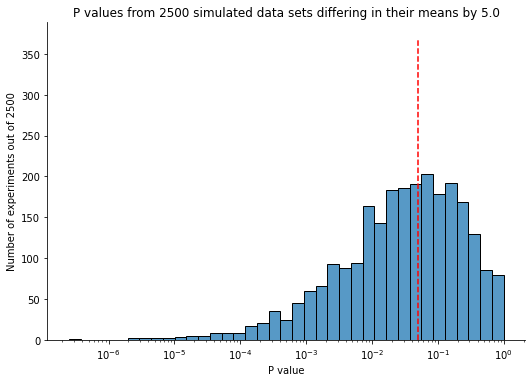

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

np.random.seed(111)

mean = 10
SD   = 5
N    = 10

p_values = []

for _ in range(2500):
    pop_1 = np.random.normal(loc=mean, scale=SD, size=N)
    pop_2 = np.random.normal(loc=mean+5, scale=SD, size=N)

    stat, p_value = stats.ttest_ind(pop_1, pop_2)
    p_values.append(p_value)

sns.displot(p_values, log_scale=True, aspect=1.5)
plt.vlines(.05, 0, 370, colors='r', linestyles='dashed')
plt.xlabel("P value")
plt.ylabel("Number of experiments out of 2500")
plt.title("P values from 2500 simulated data sets differing in their means by 5.0");


In [23]:
np.percentile(p_values, [2.5, 97.5])

array([1.69152124e-04, 7.02604441e-01])

The middle 95% of the P value range from 0.000169 to 0.7026, a span covering more than three orders of magnitude!

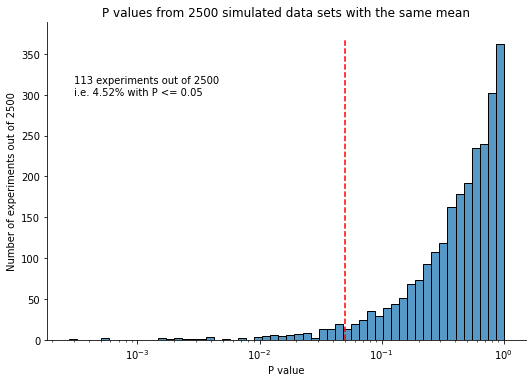

In [33]:
mean = 10
SD   = 5
N    = 10

p_values = []

for _ in range(2500):
    pop_1 = np.random.normal(loc=mean, scale=SD, size=N)
    pop_2 = np.random.normal(loc=mean+0, scale=SD, size=N)

    stat, p_value = stats.ttest_ind(pop_1, pop_2)
    p_values.append(p_value)

sns.displot(p_values, log_scale=True, aspect=1.5)
plt.vlines(.05, 0, 370, colors='r', linestyles='dashed')
plt.xlabel("P value")
plt.ylabel("Number of experiments out of 2500")
signif = sum(np.array(p_values)<=0.05)
plt.text(x=0.0003, y=300, s=f"{signif} experiments out of 2500 \ni.e. {100 * signif / 2500}% with P <= 0.05")
plt.title("P values from 2500 simulated data sets with the same mean");

## Statistical significance and hypothesis testing

### Type I and type II errors

Statistical hypothesis testing makes a decision based on the results of one comparison. When you make this deicision, there are two kinds of mistakes you can make:

|             | reject H0    | do not reject H0 |
|-------------|--------------|------------------|
| H0 is true  | type I error | (no error)       |
| H0 is false | (no error)   | type II error    |

- type I error: when there really is no difference (or association or correlation) between the populations, random sampling can lead to a difference large enough to be a statistically significant. Also called **false positive**. _E.g. send email to spam folder when good, or verdict guilty when did not commit the crime._
- type II error: when there really is a difference, random sampling (and small sample size) can lead to a difference small enough to be not statistically significant. Also called **falsed negative**. _E.g. place email iin inbox when spam, or verdict not guilty when did commit the crime._

_Another error, called type S error or type III, when the sign of the difference is backwards/reversed._

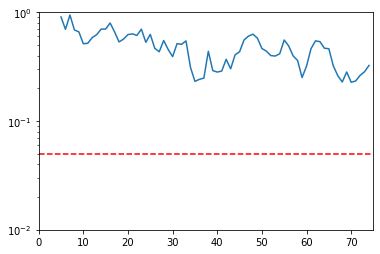

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

mean = 0
SD   = 1
N    = 75

pop_1 = np.random.normal(loc=mean, scale=SD, size=N)
pop_2 = np.random.normal(loc=mean, scale=SD, size=N)

p_values = []

for _ in range(5, N):
	subset_1 = pop_1[:_]
	subset_2 = pop_2[:_]
	
	stat, p_value = stats.ttest_ind(subset_1, subset_2)
	p_values.append(p_value)
	
plt.plot([_ for _ in range(5, N)], p_values)
plt.xlim((0,75))
plt.yscale('log')
plt.ylim((.01, 1))
plt.hlines(.05, 0, 75, colors='r', linestyles='dashed')